In [4]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [5]:
# Installing and importing statsmodels if not already available
try:
    import statsmodels.api as sm
except ModuleNotFoundError:
    !pip install statsmodels
    import statsmodels.api as sm

     ---------------------------------------- 9.8/9.8 MB 19.1 MB/s eta 0:00:00
     ------------------------------------- 232.9/232.9 kB 13.9 MB/s eta 0:00:00


In [6]:
# Step 1: Loading the dataset
file_path = 'Big_Black_Money_Dataset (2).csv'
data = pd.read_csv(file_path)

In [8]:
# Step 2: Preparing data for Polynomial Regression
X_amount = data[['Amount (USD)']]
X_persons = data[['Person Involved']]
y = data['Shell Companies Involved']

In [9]:
# Step 3: Creating polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_amount_poly = poly.fit_transform(X_amount)
X_persons_poly = poly.fit_transform(X_persons)

In [11]:
# Step 4: Fitting polynomial regression models
# Model for Amount
model_amount = LinearRegression()
model_amount.fit(X_amount_poly, y)
y_pred_amount = model_amount.predict(X_amount_poly)

# Model for Persons Involved
model_persons = LinearRegression()
model_persons.fit(X_persons_poly, y)
y_pred_persons = model_persons.predict(X_persons_poly)

In [12]:
# Step 5: Model evaluation (R-squared values)
r2_amount = r2_score(y, y_pred_amount)
r2_persons = r2_score(y, y_pred_persons)

In [13]:
# Step 6: ANOVA (Analysis of Variance)
anova_model_amount = sm.OLS(y, sm.add_constant(X_amount)).fit()
anova_summary_amount = anova_model_amount.summary()

anova_model_persons = sm.OLS(y, sm.add_constant(X_persons)).fit()
anova_summary_persons = anova_model_persons.summary()

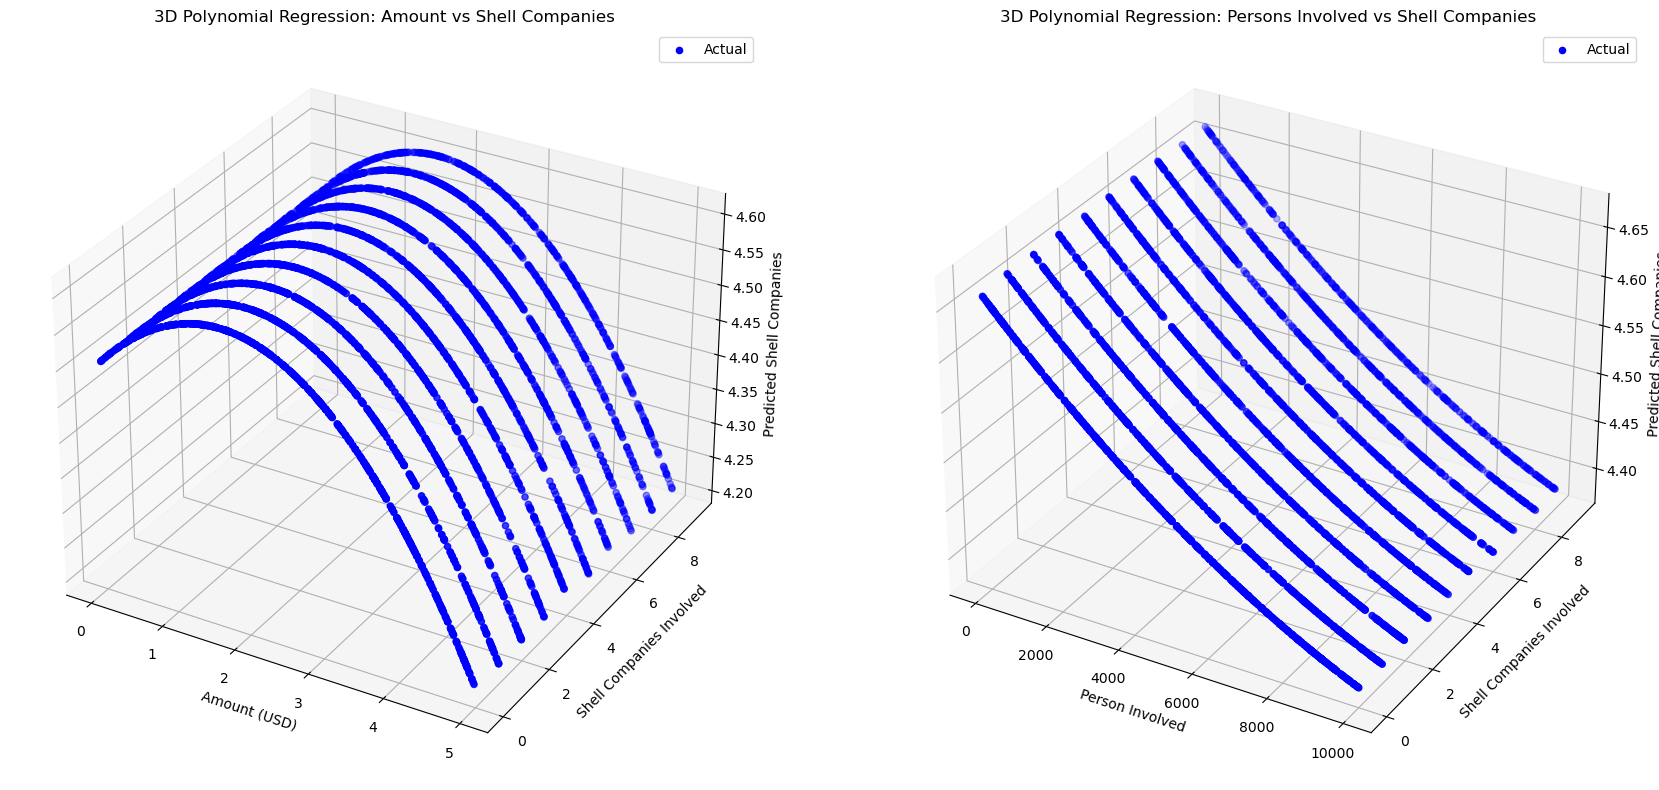

In [15]:
# Step 7: Plotting the results with trend lines in 3D
fig = plt.figure(figsize=(18, 8))

# 3D Graph 1: Amount vs Shell Companies
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data['Amount (USD)'], y, y_pred_amount, color='blue', label='Actual')
ax1.set_title('3D Polynomial Regression: Amount vs Shell Companies')
ax1.set_xlabel('Amount (USD)')
ax1.set_ylabel('Shell Companies Involved')
ax1.set_zlabel('Predicted Shell Companies')
ax1.legend()

# 3D Graph 2: Persons Involved vs Shell Companies
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(data['Person Involved'], y, y_pred_persons, color='blue', label='Actual')
ax2.set_title('3D Polynomial Regression: Persons Involved vs Shell Companies')
ax2.set_xlabel('Person Involved')
ax2.set_ylabel('Shell Companies Involved')
ax2.set_zlabel('Predicted Shell Companies')
ax2.legend()

# Show the 3D plots
plt.tight_layout()
plt.show()

In [16]:
# Step 8: Printing model evaluation metrics
print("R-squared for Amount vs Shell Companies:", r2_amount)
print("R-squared for Persons Involved vs Shell Companies:", r2_persons)
print("\nANOVA Summary for Amount vs Shell Companies:\n", anova_summary_amount)
print("\nANOVA Summary for Persons Involved vs Shell Companies:\n", anova_summary_persons)

R-squared for Amount vs Shell Companies: 0.0013894108750236445
R-squared for Persons Involved vs Shell Companies: 0.0007950126302206373

ANOVA Summary for Amount vs Shell Companies:
                                OLS Regression Results                               
Dep. Variable:     Shell Companies Involved   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                  0.001
Method:                       Least Squares   F-statistic:                     3.979
Date:                      Tue, 14 Jan 2025   Prob (F-statistic):             0.0461
Time:                              12:58:58   Log-Likelihood:                -11167.
No. Observations:                      4509   AIC:                         2.234e+04
Df Residuals:                          4507   BIC:                         2.235e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust         